In [3]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

In [4]:
states = gpd.read_file("/Users/sotiris_sideris/Desktop/FOUNDATIONS/CLASS_013/homework/13-homework/cb_2016_us_state_500k/cb_2016_us_state_500k.shp")
states.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."


In [5]:
powerplants = pd.read_csv('powerplants.csv')

In [6]:
powerplants.head()

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,...,0.0,0.0,NaN,NaN,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.583889,-86.283056
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,...,0.0,0.0,NaN,NaN,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201607,34.012800,-85.970800
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,...,0.0,0.0,NaN,NaN,Coal = 1034 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201607,33.644344,-87.196486


In [7]:
def make_point(row):
    return Point(row.Longitude, row.Latitude)

points = powerplants.apply(make_point, axis=1)
powerplants = gpd.GeoDataFrame(powerplants, geometry=points)
powerplants.crs = {'init': 'epsg:4326'}
#powerplants.head(2)

In [8]:
states = states.to_crs(powerplants.crs)
states.head(2)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."


In [9]:
powerplants.crs

{'init': 'epsg:4326'}

In [10]:
states.crs

{'init': 'epsg:4326'}

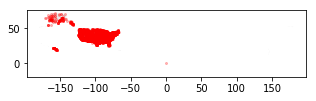

In [11]:
ax = states.plot(figsize=(5,5), linewidth=0.25, edgecolor='white', color='lightgrey')
powerplants.plot(markersize=2, alpha=0.25, color='red', ax=ax)

## 1. How many power plants are in each state?

In [12]:
powerplants_with_states = gpd.sjoin(powerplants, states, how='left', op='within')
powerplants_with_states.head()

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,...,0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,...,0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,...,0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL


In [13]:
powerplants_with_states.dtypes

Plant_Code       int64
Plant_Name      object
Utility_Na      object
Utility_ID       int64
sector_nam      object
City            object
County          object
Zip              int64
Street_Add      object
PrimSource      object
Total_MW       float64
Coal_MW        float64
NG_MW          float64
Crude_MW       float64
Bio_MW         float64
Hydro_MW       float64
HydroPS_MW     float64
Nuclear_MW     float64
Solar_MW       float64
Wind_MW        float64
Geo_MW         float64
Other_MW       float64
source_des      object
tech_desc       object
Source          object
Period           int64
Latitude       float64
Longitude      float64
geometry        object
index_right     object
AFFGEOID        object
ALAND          float64
AWATER         float64
GEOID           object
LSAD            object
NAME            object
STATEFP         object
STATENS         object
STUSPS          object
dtype: object

In [14]:
powerplants_with_states['NAME'].value_counts()

California              1222
North Carolina           461
Texas                    396
New York                 372
Minnesota                274
Massachusetts            254
Iowa                     222
Michigan                 219
New Jersey               207
Pennsylvania             207
Illinois                 200
Wisconsin                174
Colorado                 153
Ohio                     148
Oregon                   145
Florida                  144
Georgia                  139
Alaska                   138
Washington               138
Idaho                    136
Indiana                  133
Virginia                 131
Kansas                   129
Missouri                 117
Arizona                  113
Nebraska                  98
Maine                     97
South Carolina            95
Oklahoma                  94
New Mexico                92
Utah                      89
Connecticut               88
Louisiana                 84
Maryland                  76
Vermont       

## 2. Which power plants are in New York?

In [15]:
powerplants_with_states.loc[powerplants_with_states['NAME'] == 'New York']

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
49,88,Ashokan,New York Power Authority,15296,Electric Utility,Kingston,Ulster,12401,Route 28A,hydroelectric,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
363,579,Central Hudson High Falls,Central Hudson Gas & Elec Corp,3249,Electric Utility,High Falls,ULSTER,12440,Route 213,hydroelectric,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
387,625,Upper Mechanicville,New York State Elec & Gas Corp,13511,Electric Utility,Town of Stillwater,Saratoga,12170,40 Hudson Avenue,hydroelectric,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
469,808,Jarvis (Hinckley),New York Power Authority,15296,Electric Utility,Hinckley,Oneida,13352,None,hydroelectric,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
1169,2480,Danskammer Generating Station,Danskammer Energy,58971,IPP Non-CHP,Newsburgh,Orange,12550,994 River Road,natural gas,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
1170,2481,Dashville,Central Hudson Gas & Elec Corp,3249,Electric Utility,Dashville,Ulster,12471,Route 213,hydroelectric,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
1171,2483,Neversink,New York Power Authority,15296,Electric Utility,Grahmsville,Sullivan,12740,7858 Route 42,hydroelectric,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
1172,2485,South Cairo,Central Hudson Gas & Elec Corp,3249,Electric Utility,Cairo,Greene,12413,Route 32,petroleum,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
1173,2486,Sturgeon,Central Hudson Gas & Elec Corp,3249,Electric Utility,Tillson,Ulster,12486,Coutant Road,hydroelectric,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
1174,2487,West Coxsackie,Central Hudson Gas & Elec Corp,3249,Electric Utility,Coxsackie,Greene,12051,Baily Street,petroleum,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY


## 3. Which state has the most hydroelectric power plants?

In [16]:
states.reset_index().head()

,index,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."


In [17]:
nabes_with_powerplants = gpd.sjoin(states.reset_index(), powerplants, how='inner', op='intersects')
nabes_with_powerplants.head(10)

,index,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,...,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,...,0.0,0.0,NaN,NaN,Hydroelectric = 186 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.680394,-85.911442
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,...,0.0,0.0,NaN,NaN,Natural Gas = 721.8 MW,Natural Gas Fired Combined Cycle,"EIA-860, EIA-860M and EIA-923",201607,33.000669,-85.903278
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,...,0.0,0.0,NaN,NaN,Hydroelectric = 47 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.574300,-85.890100
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,...,0.0,0.0,NaN,NaN,Hydroelectric = 78 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.535436,-85.887614
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,...,0.0,0.0,NaN,NaN,Hydroelectric = 132 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.258281,-85.616047
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,...,0.0,0.0,NaN,NaN,Petroleum = 9 MW,Petroleum Liquids,"EIA-860, EIA-860M and EIA-923",201607,31.262356,-85.402737
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,...,0.0,0.0,NaN,NaN,Hydroelectric = 0.2 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.813836,-85.167786
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,...,0.0,0.0,NaN,NaN,Nuclear = 1757 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201607,31.223100,-85.111600
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,...,0.0,0.0,NaN,NaN,Natural Gas = 1816 MW,Natural Gas Fired Combined Cycle,"EIA-860, EIA-860M and EIA-923",201607,32.607800,-85.097500
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,...,0.0,0.0,NaN,NaN,Hydroelectric = 189.7 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.661976,-85.091552


In [18]:
nabes_with_powerplants.groupby('NAME').size().sort_values(ascending=False).head()

NAME
California        1222
North Carolina     461
Texas              396
New York           372
Minnesota          274
dtype: int64

In [19]:
#states.head(3)

In [20]:
#nabes_with_powerplants.head(10)

In [21]:
nabes_with_powerplants.groupby('index').size().head(10)

index
0      72
1     138
2     113
3      55
4    1222
5     153
6      88
7      25
8       2
9     139
dtype: int64

In [22]:
states['powerplant_count'] = nabes_with_powerplants.groupby('index').size()
states.head(10)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,powerplant_count
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",72.0
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5...",138.0
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",113.0
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",55.0
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",1222.0
5,0400000US08,268429343790,1175112870,08,00,Colorado,08,01779779,CO,"POLYGON ((-109.060253 38.599328, -109.059541 3...",153.0
6,0400000US09,12542638347,1815476291,09,00,Connecticut,09,01779780,CT,"(POLYGON ((-72.761427 41.242333, -72.759733 41...",88.0
7,0400000US10,5047194742,1398720828,10,00,Delaware,10,01779781,DE,"(POLYGON ((-75.565546 39.51485, -75.5617429999...",25.0
8,0400000US11,158364992,18633403,11,00,District of Columbia,11,01702382,DC,"POLYGON ((-77.119759 38.934343, -77.1125318000...",2.0
9,0400000US13,149169848456,4741100880,13,00,Georgia,13,01705317,GA,"(POLYGON ((-81.27939099999999 31.30792, -81.27...",139.0


## 4. Which state produces the most energy from coal?


In [23]:
#nabes_with_powerplants.dtypes
#nabes_with_powerplants['PrimSource'].value_counts()

In [24]:
nabes_with_powerplants.loc[nabes_with_powerplants['PrimSource'] == 'coal']

,index,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,...,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,...,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,...,0.0,0.0,NaN,NaN,Coal = 556 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201607,31.488019,-87.910747
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,...,0.0,0.0,NaN,NaN,"Coal = 1606 MW, Natural Gas = 256 MW, Petroleu...",Conventional Steam Coal; Natural Gas Steam Tur...,"EIA-860, EIA-860M and EIA-923",201607,33.244211,-86.458056
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,...,0.0,0.0,NaN,NaN,"Coal = 472 MW, Natural Gas = 363.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,34.743900,-87.848600
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,...,0.0,0.0,NaN,NaN,Coal = 1034 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201607,33.644344,-87.196486
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,...,0.0,0.0,NaN,NaN,Coal = 2725.9 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201607,33.631900,-87.059700
1,1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,...,0.0,0.0,NaN,NaN,"Coal = 75 MW, Petroleum = 2.8 MW",Conventional Steam Coal; Petroleum Liquids;,"EIA-860, EIA-860M and EIA-923",201607,63.854200,-148.950000
1,1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,...,0.0,0.0,NaN,NaN,Coal = 25.7 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201607,64.847743,-147.735063
1,1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,...,0.0,0.0,NaN,NaN,Coal = 24 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201607,64.825601,-147.648627
1,1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,...,0.0,0.0,NaN,NaN,"Coal = 20 MW, Petroleum = 7.4 MW",Conventional Steam Coal; Petroleum Liquids;,"EIA-860, EIA-860M and EIA-923",201607,64.671410,-147.075988


## 5. Map states with nuclear power plants in red, and states without in grey. Do the same thing for solar.

In [25]:
#nabes_with_powerplants['PrimSource'].value_counts()

#### nuclear

In [26]:
nuclear_plants_states = powerplants[(powerplants.PrimSource == 'nuclear')]

In [27]:
without_nuclear_plants = powerplants[~(powerplants.PrimSource == 'nuclear')]

(-197.09527795, 197.72483894999999, -18.844392050000003, 75.660855050000009)

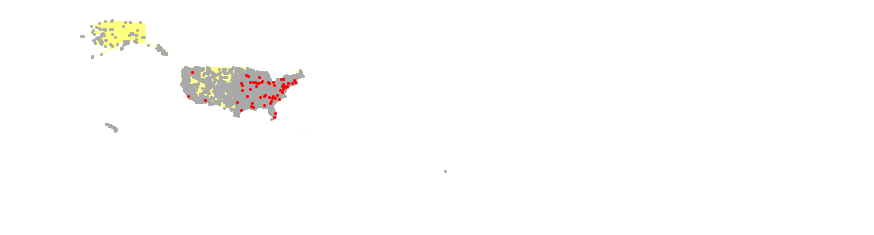

In [28]:
ax = states.plot(figsize=(15,15), color='yellow', linewidth=0.25, edgecolor='white')
without_nuclear_plants.plot(color='darkgrey', markeredgewidth=0, markersize=3, ax=ax)
nuclear_plants_states.plot(color='red', markeredgewidth=0, markersize=3, ax=ax)
ax.axis('off')

#### solar

In [29]:
solar_plants_states = powerplants[(powerplants.PrimSource == 'solar')]

In [30]:
without_solar_plants = powerplants[~(powerplants.PrimSource == 'solar')]

(-197.09527795, 197.72483894999999, -18.844392050000003, 75.660855050000009)

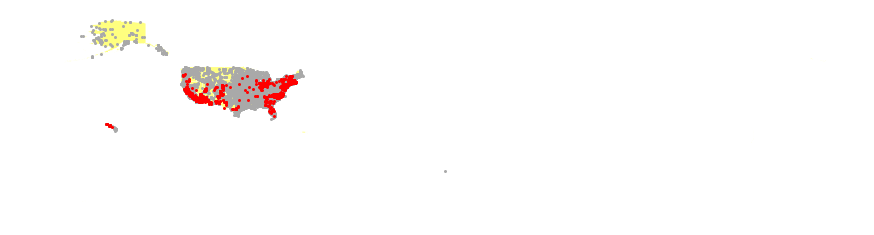

In [31]:
ax = states.plot(figsize=(15,15), color='yellow', linewidth=0.25, edgecolor='white')
without_solar_plants.plot(color='darkgrey', markeredgewidth=0, markersize=3, ax=ax)
solar_plants_states.plot(color='red', markeredgewidth=0, markersize=3, ax=ax)
ax.axis('off')

## 8. Make a map of total wind (or solar or coal) energy produced by each state, with little being a light color and high emissions being a brighter/darker color.